In [9]:
from sklearn.ensemble import GradientBoostingClassifier
#использовать n_estimators, learning_rate, verbose; метод staged_decision_function

In [10]:
from sklearn.model_selection import train_test_split
#test_size = 0.33, tandom_state = 42

In [11]:
from sklearn.metrics import log_loss
#predict = clf.predict_proba(X_test)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_losses(test_loss, train_loss):
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(test_loss.index(min(test_loss)),min(test_loss), "*")
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('gbm-data.csv')
y = data.iloc[:,0].values
X = data.iloc[:,1:].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [16]:
def metrics(clf, X_test, X_train):
    test_scores = []
    train_scores = []
    for i, pred in enumerate(clf.staged_decision_function(X_test)):
        y_pred = 1 / (1 + np.exp(-pred))
        #print(pred.shape[0])
        test_scores.append(log_loss(y_test, y_pred))
    for i, pred in enumerate(clf.staged_decision_function(X_train)):
        y_pred = 1 / (1 + np.exp(-pred))
        train_scores.append(log_loss(y_train, y_pred))
    return test_scores, train_scores


Минимальное значение метрики на тестовой выборке: 0.5822942594278475  достигается на  0
Минимальное значение метрики на тренировочной выборке: 0.00020857611394801438  достигается на  180


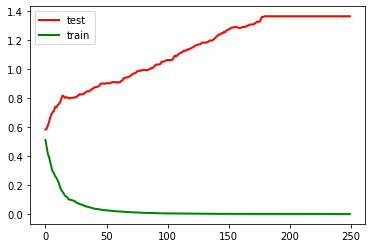

In [17]:
lr = [1, 0.5, 0.3, 0.2, 0.1]

clf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr[0], random_state=241, verbose = False)
clf.fit(X_train, y_train)
test, train = metrics(clf, X_test, X_train)
show_losses(test,train)
print('Минимальное значение метрики на тестовой выборке:',min(test),' достигается на ', test.index(min(test)))
print('Минимальное значение метрики на тренировочной выборке:',min(train),' достигается на ', train.index(min(train)))

Минимальное значение метрики на тестовой выборке: 0.5560965876181979  достигается на  6
Минимальное значение метрики на тренировочной выборке: 0.00102236807636832  достигается на  249


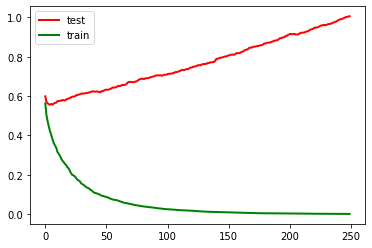

In [18]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr[1], random_state=241, verbose = False)
clf.fit(X_train, y_train)
test, train = metrics(clf, X_test, X_train)
show_losses(test,train)
print('Минимальное значение метрики на тестовой выборке:',min(test),' достигается на ', test.index(min(test)))
print('Минимальное значение метрики на тренировочной выборке:',min(train),' достигается на ', train.index(min(train)))

Минимальное значение метрики на тестовой выборке: 0.5432596932316428  достигается на  10
Минимальное значение метрики на тренировочной выборке: 0.006887291001447362  достигается на  249


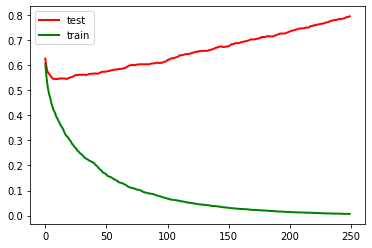

In [19]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr[2], random_state=241, verbose = False)
clf.fit(X_train, y_train)
test, train = metrics(clf, X_test, X_train)
show_losses(test,train)
print('Минимальное значение метрики на тестовой выборке:',min(test),' достигается на ', test.index(min(test)))
print('Минимальное значение метрики на тренировочной выборке:',min(train),' достигается на ', train.index(min(train)))

Минимальное значение метрики на тестовой выборке: 0.5314949511258739  достигается на  36
Минимальное значение метрики на тренировочной выборке: 0.024906124380084924  достигается на  249


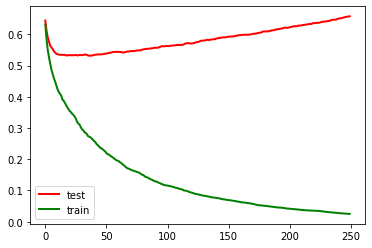

In [20]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr[3], random_state=241, verbose = False)
clf.fit(X_train, y_train)
test, train = metrics(clf, X_test, X_train)
show_losses(test,train)
print('Минимальное значение метрики на тестовой выборке:',min(test),' достигается на ', test.index(min(test)))
print('Минимальное значение метрики на тренировочной выборке:',min(train),' достигается на ', train.index(min(train)))

Минимальное значение метрики на тестовой выборке: 0.5254924770369842  достигается на  51
Минимальное значение метрики на тренировочной выборке: 0.08936962416274086  достигается на  249


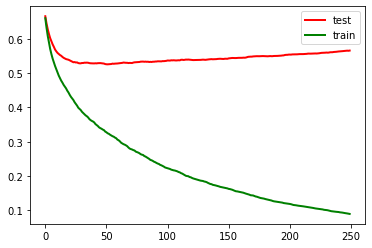

In [21]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=lr[4], random_state=241, verbose = False)
clf.fit(X_train, y_train)
test, train = metrics(clf, X_test, X_train)
show_losses(test,train)
print('Минимальное значение метрики на тестовой выборке:',min(test),' достигается на ', test.index(min(test)))
print('Минимальное значение метрики на тренировочной выборке:',min(train),' достигается на ', train.index(min(train)))

Минимальное значение метрики на тестовой выборке: 0.539797176613974  достигается на  18
Минимальное значение метрики на тренировочной выборке: 0.44850754621546973  достигается на  18


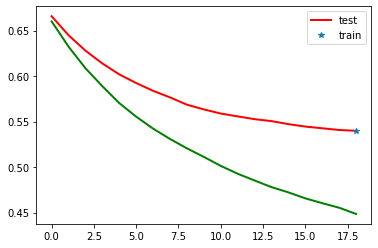

In [48]:
clf = GradientBoostingClassifier(n_estimators=19, random_state=241, verbose = False)
clf.fit(X_train, y_train)
test, train = metrics(clf, X_test, X_train)
show_losses(test,train)
print('Минимальное значение метрики на тестовой выборке:',min(test),' достигается на ', test.index(min(test)))
print('Минимальное значение метрики на тренировочной выборке:',min(train),' достигается на ', train.index(min(train)))

In [49]:
pred = clf.predict_proba(X_test)

In [50]:
log_loss(y_test, pred)

0.539797176613974

In [40]:
for i in range(len(test)):
    print(i+1, test[i])

1 0.6440178252532975
2 0.6116804536918495
3 0.5904839372496186
4 0.5767364515122595
5 0.5634637754160209
6 0.558570551954361
7 0.5527472210128039
8 0.546094123164476
9 0.5415196492514055
10 0.5377396014457767
11 0.5359827238623724
12 0.5350036844397639
13 0.5341971667190248
14 0.5344523236810379
15 0.5340414790996014
16 0.5340795445118905
17 0.534199725851716
18 0.5319968292551419
19 0.532642144478516
20 0.533064575692667
21 0.5332164248097371
22 0.5328166256599218
23 0.5330401194846751
24 0.5328327610719583
25 0.5330345367944145
26 0.5338390881075278
27 0.5325496803961498
28 0.5324428142355123
29 0.5341544822047127
30 0.5333056420400678
31 0.5332794701941924
32 0.5338107272807234
33 0.5345622488892401
34 0.5353740522402994
35 0.5340097322552098
36 0.5318157715927048
37 0.5314949511258739
38 0.5317620190543397
39 0.5316732082656572
40 0.5327982175248891
41 0.5339001856602966
42 0.5343715135939727
43 0.5350718977359208
44 0.5354483699662462
45 0.5351767890250203
46 0.5358945553887341
47